In [2]:
%config Completer.use_jedi = False

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %config Completer.use_jedi = False
    ^


In [133]:
data = read.csv("../input/microplastic/Microplastic_lm.csv")
head(data)

,Average.Microplastic,Year,zone,Average.of.Merge1.Production,MP_Change,Yield_change,Average.of.distance,CPC_Group_En,Name_En
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.007,1970,27,0.0,0,0,7.779659,"Fish live, fresh or chilled for human consumption",Atlantic cod
2,0.035,1970,27,58.8,0,0,7.779659,"Fish live, fresh or chilled for human consumption",Atlantic salmon
3,0.007,1970,27,0.0,0,0,7.779659,"Fish live, fresh or chilled for human consumption",Atlantic wolffish
4,0.007,1970,27,0.0,0,0,7.779659,"Fish live, fresh or chilled for human consumption",Bastard halibut
5,0.007,1970,27,0.0,0,0,7.779659,"Fish live, fresh or chilled for human consumption",Chars nei
6,0.007,1970,27,0.0,0,0,7.779659,"Fish live, fresh or chilled for human consumption",European eel


In [134]:
summary(data) 

 Average.Microplastic      Year           zone      
 Min.   :   0.000     Min.   :1970   Min.   :18.00  
 1st Qu.:   0.031     1st Qu.:2004   1st Qu.:31.00  
 Median :   0.345     Median :2014   Median :57.00  
 Mean   :  48.454     Mean   :2010   Mean   :51.55  
 3rd Qu.:   3.449     3rd Qu.:2016   3rd Qu.:71.00  
 Max.   :3739.891     Max.   :2018   Max.   :87.00  
 NA's   :836                                        
 Average.of.Merge1.Production   MP_Change         Yield_change     
 Min.   :      0              Min.   :  -1.000   Min.   : -1.0000  
 1st Qu.:      0              1st Qu.:  -0.975   1st Qu.: -0.1269  
 Median :     36              Median :   0.000   Median :  0.0000  
 Mean   :  29266              Mean   :  40.681   Mean   :  0.2848  
 3rd Qu.:   1850              3rd Qu.:   0.000   3rd Qu.:  0.0000  
 Max.   :2874620              Max.   :4220.176   Max.   :462.7681  
 NA's   :841                                     NA's   :8         
 Average.of.distance CPC_Group_E

In [135]:
data = na.omit(data)

In [136]:
summary(data)

 Average.Microplastic      Year           zone      
 Min.   :   0.000     Min.   :1970   Min.   :21.00  
 1st Qu.:   0.031     1st Qu.:2004   1st Qu.:31.00  
 Median :   0.345     Median :2014   Median :57.00  
 Mean   :  48.521     Mean   :2009   Mean   :51.08  
 3rd Qu.:   3.449     3rd Qu.:2016   3rd Qu.:71.00  
 Max.   :3739.891     Max.   :2018   Max.   :87.00  
 Average.of.Merge1.Production   MP_Change         Yield_change     
 Min.   :      0              Min.   :  -1.000   Min.   : -1.0000  
 1st Qu.:      0              1st Qu.:  -0.004   1st Qu.:  0.0000  
 Median :     36              Median :   0.000   Median :  0.0000  
 Mean   :  29266              Mean   :  50.385   Mean   :  0.5197  
 3rd Qu.:   1850              3rd Qu.:   0.721   3rd Qu.:  0.0000  
 Max.   :2874620              Max.   :4220.176   Max.   :462.7681  
 Average.of.distance CPC_Group_En         Name_En         
 Min.   : 2.435      Length:3589        Length:3589       
 1st Qu.: 5.592      Class :charact

In [137]:
data$zone = factor(data$zone)
data$CPC_Group_En = factor(data$CPC_Group_En)

In [138]:
summary(data)

 Average.Microplastic      Year           zone     Average.of.Merge1.Production
 Min.   :   0.000     Min.   :1970   31     :641   Min.   :      0             
 1st Qu.:   0.031     1st Qu.:2004   77     :543   1st Qu.:      0             
 Median :   0.345     Median :2014   61     :526   Median :     36             
 Mean   :  48.521     Mean   :2009   27     :360   Mean   :  29266             
 3rd Qu.:   3.449     3rd Qu.:2016   21     :292   3rd Qu.:   1850             
 Max.   :3739.891     Max.   :2018   71     :282   Max.   :2874620             
                                     (Other):945                               
   MP_Change         Yield_change      Average.of.distance
 Min.   :  -1.000   Min.   : -1.0000   Min.   : 2.435     
 1st Qu.:  -0.004   1st Qu.:  0.0000   1st Qu.: 5.592     
 Median :   0.000   Median :  0.0000   Median :11.770     
 Mean   :  50.385   Mean   :  0.5197   Mean   :16.085     
 3rd Qu.:   0.721   3rd Qu.:  0.0000   3rd Qu.:23.722     
 Max. 

In [139]:
data$Average.Microplastic = ifelse(data$Average.Microplastic<1,data$Average.Microplastic * 1000000, data$Average.Microplastic)

In [140]:
#we are assuming that datapoints with 0 microplastic are those that were not recorded so we will be removing them
clean_data =  data[data$Average.Microplastic!=0 & data$Average.of.Merge1.Production>0,]

In [ ]:
#exploratory analysis -> what we want to predict is the loss in yield with respect to increase in distance and microplastic

# is there a correlation between the loss in yield to the increase in microplastic

library(dplyr)
cor_data = select(clean_data,-c(Year,CPC_Group_En,Name_En,zone))
library(corrplot)
corrplot(cor(cor_data), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

# the correlation between the different numeric variabels are weak BUt what about in different areas 

In [3]:
cor_data = select(data[data$zone==21 & data$MP_Change>-1,],-c(Year,CPC_Group_En,Name_En,zone))
corrplot(cor(cor_data), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

ERROR: Error in select(data[data$zone == 21 & data$MP_Change > -1, ], -c(Year, : could not find function "select"


In [141]:
summary(clean_data)

 Average.Microplastic      Year           zone     Average.of.Merge1.Production
 Min.   :     1.0     Min.   :1970   61     :371   Min.   :      0.0           
 1st Qu.:    41.3     1st Qu.:2006   31     :345   1st Qu.:     14.0           
 Median : 19547.0     Median :2015   27     :288   Median :    283.8           
 Mean   :132936.2     Mean   :2011   71     :253   Mean   :  37141.6           
 3rd Qu.:136000.0     3rd Qu.:2016   21     :208   3rd Qu.:   5087.2           
 Max.   :973645.0     Max.   :2018   77     :196   Max.   :2874620.5           
                                     (Other):679                               
   MP_Change         Yield_change      Average.of.distance
 Min.   :  -0.999   Min.   : -0.9981   Min.   : 2.435     
 1st Qu.:   0.000   1st Qu.:  0.0000   1st Qu.: 6.323     
 Median :   0.000   Median :  0.0000   Median :10.616     
 Mean   :  69.152   Mean   :  0.7006   Mean   :15.087     
 3rd Qu.:   1.974   3rd Qu.:  0.0715   3rd Qu.:20.742     
 Max. 

In [ ]:
plot(clean_data$Average.Microplastic,(clean_data$Average.of.Merge1.Production), xlab = "Microplastic",ylab = "production")

In [ ]:
plot(clean_data$MP_Change,clean_data$Yield_change)

In [ ]:
plot(log(clean_data$Average.Microplastic),log(clean_data$Average.of.Merge1.Production+1))

In [143]:
clean_data$production_log = log(clean_data$Average.of.Merge1.Production)
clean_data$microplastic = log(clean_data$Average.Microplastic)

In [ ]:
library(ggplot2)
 ggplot(clean_data, aes(x=microplastic, y=production_log)) + 
  geom_violin()

In [ ]:
cor_data = select(clean_data[clean_data$zone==21,],-c(Year,CPC_Group_En,Name_En,zone))
corrplot(cor(cor_data), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [ ]:
ggplot(clean_data, aes(microplastic,production_log, colour = zone)) +
  geom_smooth(se = FALSE, method = lm)
# majority of the zones have a positive correlation

In [ ]:
ggplot(clean_data ,aes(microplastic,production_log, colour = CPC_Group_En)) +
  geom_smooth(se = FALSE, method = lm)
# other aquatic plants and animal have a nagative impact but the data poitns are based on 200 

In [ ]:
ggplot(clean_data[clean_data$zone==21,], aes(microplastic,production_log, colour = CPC_Group_En)) +
  geom_smooth(se = FALSE, method = lm)
# so even though we saw a positve correlation in area 21 if we focus on the species we can see that it affects different species /group differently in the area

In [ ]:
ggplot(clean_data[clean_data$zone==21,], aes(microplastic,production_log, colour = Name_En)) +
  geom_smooth(se = FALSE, method = lm)

In [150]:
model = lm(production_log~microplastic+(Average.of.distance) ,data= clean_data)

lm(formula = production_log ~ microplastic + (Average.of.distance) + 
    factor(Year), data = clean_data)

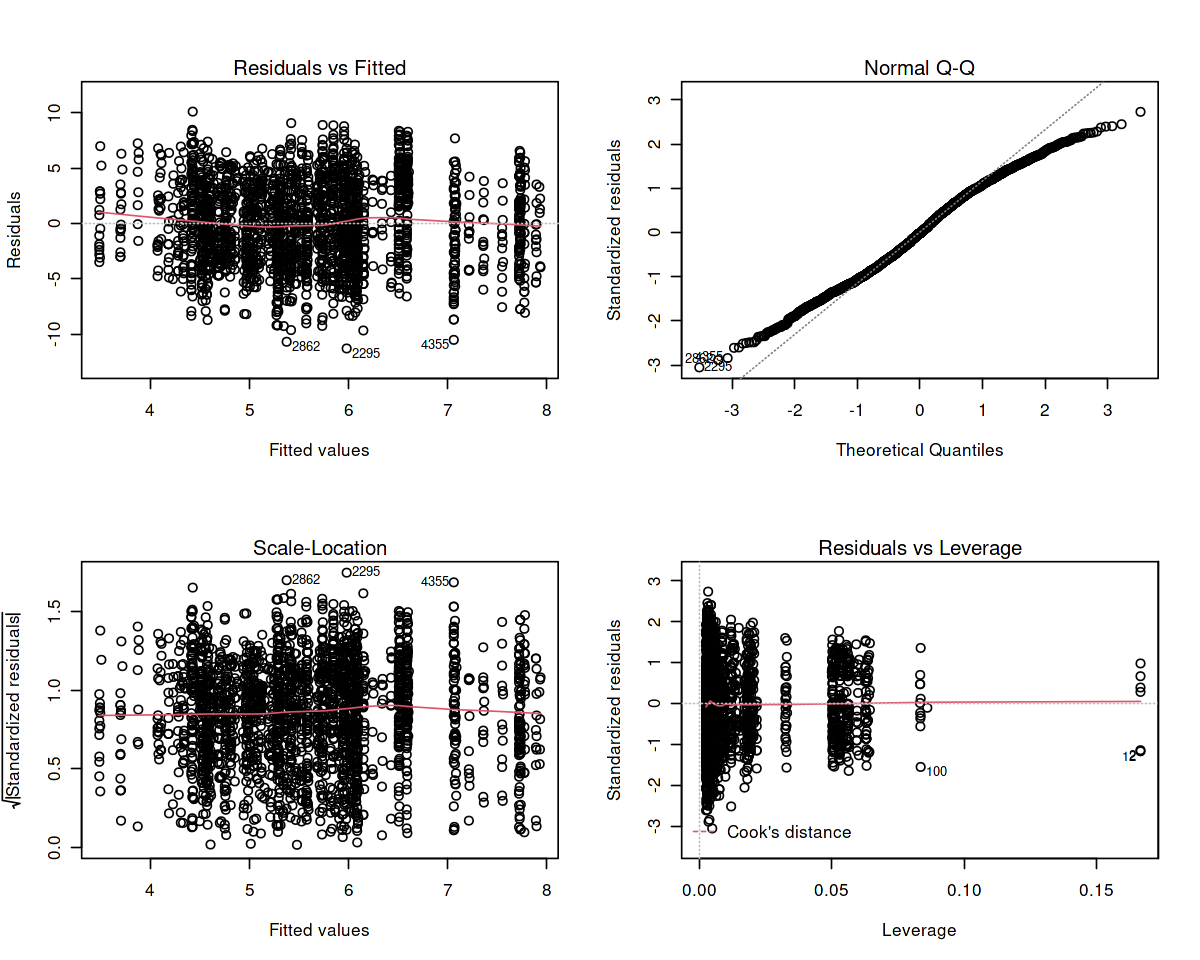

In [148]:
par(mfrow=c(2,2))
model$call
plot(model)

In [149]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1       0.1990402      1.601301       0
 Alternative hypothesis: rho != 0

In [ ]:
summary(model)

In [ ]:
coef(model)>0

In [4]:
# create a plm and see if the effects are the same ( but we will remove the name column)\
# data_plm =read.csv("../input/microplastic/MicroPlastic(final).csv")
# data_plm$zone = factor(data_plm$zone)
# data_plm$CPC_Group_En = factor(data_plm$CPC_Group_En)
# data_plm$production_log = log(data_plm$Average.of.Merge1.Production)
# data_plm$microplastic = log(data_plm$Average.Microplastic)
# summary(data_plm)

# data_plm =read.csv("../input/microplastic/microplastic_zone_plm.csv")
# data_plm$zone = factor(data_plm$zone)
# data_plm$production_log = log(data_plm$Average.of.Merge1.Production+1)
# data_plm$microplastic = log(data_plm$Average.Microplastic+1)
# summary(data_plm)


data_plm =read.csv("../input/microplastic/microplastic_species.csv")
data_plm$Name_En = factor(data_plm$Name_En)
data_plm$Average.Microplastic = ifelse(data_plm$Average.Microplastic<1,data_plm$Average.Microplastic * 1000000, data_plm$Average.Microplastic)
data_plm = data_plm[data_plm$Average.Microplastic!=0 & data_plm$Average.of.Merge1.Production>0,]
data_plm$production_log = log(data_plm$Average.of.Merge1.Production)
data_plm$microplastic = log(data_plm$Average.Microplastic)
summary(data_plm) 



 Average.Microplastic      Year      Average.of.Merge1.Production
 Min.   :     1.0     Min.   :1970   Min.   :      0.0           
 1st Qu.:     9.7     1st Qu.:2003   1st Qu.:     13.2           
 Median :  2000.0     Median :2014   Median :    241.2           
 Mean   :130181.3     Mean   :2010   Mean   :  28418.1           
 3rd Qu.:120000.0     3rd Qu.:2016   3rd Qu.:   5146.0           
 Max.   :973645.0     Max.   :2018   Max.   :2874620.5           
 NA's   :437          NA's   :437    NA's   :437                 
   MP_Change         Yield_change      Average.of.distance
 Min.   :  -0.999   Min.   :   -1.00   Min.   : 2.435     
 1st Qu.:  -0.168   1st Qu.:   -0.06   1st Qu.: 6.323     
 Median :   0.000   Median :    0.00   Median :10.616     
 Mean   :  59.803   Mean   :   48.14   Mean   :14.710     
 3rd Qu.:   1.996   3rd Qu.:    0.23   3rd Qu.:20.742     
 Max.   :5891.492   Max.   :47837.46   Max.   :56.479     
 NA's   :437        NA's   :437        NA's   :437        


In [5]:
data_plm = na.omit(data_plm)

In [6]:
library(plm)
# aqua_pdf <- transform(data_plm, id2=apply(data_plm[c( "zone","CPC_Group_En")], 1, paste, collapse="."))
# aqua_pdf = pdata.frame(aqua_pdf, index = c( "id2","Year"))

# aqua_pdf <- transform(data_plm, id2=apply(data_plm[c( "zone","Name_En")], 1, paste, collapse="."))
# aqua_pdf = pdata.frame(aqua_pdf, index = c( "id2","Year"))

aqua_pdf = pdata.frame(data_plm, index = c( "Name_En","Year"))
#lin way approach ( correction for repeated obseration)
#AR1 for linear regression 

In [151]:
fixed = plm(production_log ~ microplastic+(Average.of.distance),data= aqua_pdf,model = "within")
random = plm(production_log ~ microplastic+(Average.of.distance),data= aqua_pdf,model = "random")

In [152]:
phtest(fixed,random)
#greater than 0.05 so we have to use random model


	Hausman Test

data:  production_log ~ microplastic + (Average.of.distance)
chisq = 14.683, df = 2, p-value = 0.000648
alternative hypothesis: one model is inconsistent


In [153]:
summary(fixed)


Oneway (individual) effect Within Model

Call:
plm(formula = production_log ~ microplastic + (Average.of.distance), 
    data = aqua_pdf, model = "within")

Unbalanced Panel: n = 294, T = 1-30, N = 1643

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-8.795377 -0.666570  0.036179  0.698654  8.609323 

Coefficients:
                      Estimate Std. Error t-value  Pr(>|t|)    
microplastic        -0.0202608  0.0130904 -1.5478    0.1219    
Average.of.distance  0.0286962  0.0068705  4.1767 3.147e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5335
Residual Sum of Squares: 5259.9
R-Squared:      0.014079
Adj. R-Squared: -0.20184
F-statistic: 9.61785 on 2 and 1347 DF, p-value: 7.1214e-05

In [119]:
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = production_log ~ microplastic + (Average.of.distance), 
    data = aqua_pdf, model = "random")

Unbalanced Panel: n = 294, T = 1-30, N = 1643

Effects:
                 var std.dev share
idiosyncratic  3.905   1.976 0.276
individual    10.221   3.197 0.724
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4742  0.7047  0.7553  0.7675  0.8424  0.8879 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -8.632  -1.104   0.135   0.069   1.296   8.577 

Coefficients:
                      Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)          4.5160706  0.2464026 18.3280 < 2.2e-16 ***
microplastic        -0.0229950  0.0131076 -1.7543   0.07938 .  
Average.of.distance  0.0374754  0.0066693  5.6191  1.92e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6788.6
Residual Sum of Squares: 6614.4
R-Squared:      0.0324

In [129]:
pdwtest(fixed)


	Durbin-Watson test for serial correlation in panel models

data:  production_log ~ microplastic + (Average.of.distance) + factor(Year)
DW = 1.6714, p-value = 2.912e-11
alternative hypothesis: serial correlation in idiosyncratic errors


In [123]:
test  = coeftest(fixed, vcovHC(fixed, method = "arellano"))

In [125]:
test


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)  
microplastic        -0.020261   0.019559 -1.0359   0.3004  
Average.of.distance  0.028696   0.012379  2.3181   0.0206 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [122]:
pdwtest(fixed)


	Durbin-Watson test for serial correlation in panel models

data:  production_log ~ microplastic + (Average.of.distance)
DW = 1.3473, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


In [98]:
summary(fixef(fixed))

,Estimate,Std. Error,t-value,Pr(>|t|)
Abalones nei,5.67691860,0.6304740,9.00420717,7.228123e-19
Amberjacks nei,7.23222140,1.0105692,7.15658226,1.354671e-12
American cupped oyster,10.08387840,0.3830073,26.32816148,1.378638e-123
Aquatic invertebrates nei,8.07743035,0.8258397,9.78086917,7.128422e-22
Arctic char,7.78475355,0.8931543,8.71602274,8.314953e-18
Areolate grouper,2.36151839,1.1693457,2.01952108,4.363080e-02
Atlantic bluefin tuna,5.72303908,0.9956027,5.74831608,1.113507e-08
Atlantic cod,4.64049243,0.7099297,6.53655214,8.909195e-11
Atlantic ditch shrimp,3.27069932,0.8929453,3.66282141,2.591213e-04
Atlantic halibut,6.44515401,0.8931543,7.21617050,8.899900e-13


In [99]:
zone_coef = as.data.frame(summary(fixef(fixed)))

In [13]:
zone_coef[zone_coef$Estimate == min(zone_coef$Estimate) ,]

,Estimate,Std. Error,t-value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
"Octopuses, etc. nei",-5.826814,1.973323,-2.952793,0.003203708


In [14]:
zone_coef[zone_coef$Estimate==max(zone_coef$Estimate),]

,Estimate,Std. Error,t-value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
Japanese kelp,11.76533,1.035062,11.36679,1.179897e-28


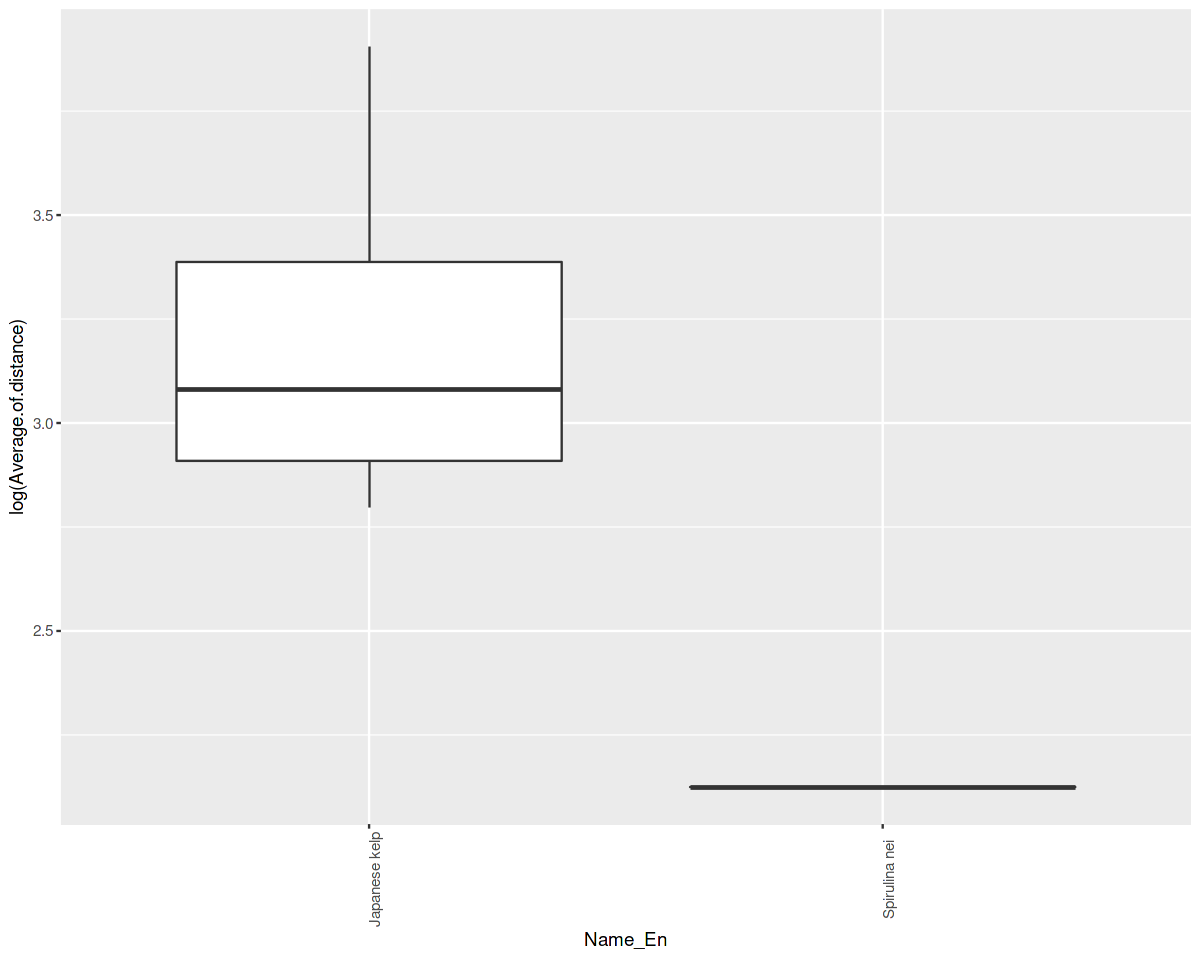

In [15]:
options(repr.plot.width=10, repr.plot.height=8)
library(ggplot2)
 ggplot(data_plm[data_plm$Name_En=="Spirulina nei" | data_plm$Name_En=="Japanese kelp",], aes(x=Name_En, y=log(Average.of.distance))) + 
  geom_boxplot()+theme(axis.text.x = element_text(angle = 90))

In [100]:
 zone_coef[zone_coef$Estimate<0 ,]

,Estimate,Std. Error,t-value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
Bear paw clam,-0.62504598,0.9961611,-0.62745469,0.5304675724
Big-scale sand smelt,-0.05431424,1.4051650,-0.03865328,0.9691725515
Bigeye trevally,-1.50102332,1.4067144,-1.06704201,0.2861440691
Brine shrimp,-1.30635645,1.4009040,-0.93250960,0.3512403390
Callinectes swimcrabs nei,-0.09711378,1.9765554,-0.04913284,0.9608207145
Caramote prawn,-1.18471165,0.8920202,-1.32812199,0.1843627991
Cockles nei,-0.98076947,1.1856842,-0.82717599,0.4082838246
Common cuttlefish,-2.13667442,1.1512337,-1.85598671,0.0636737164
Common pandora,-0.50524867,1.4049226,-0.35962742,0.7191821482


In [17]:
sample_n( zone_coef[zone_coef$Estimate>0,] ,5)

ERROR: Error in sample_n(zone_coef[zone_coef$Estimate > 0, ], 5): could not find function "sample_n"


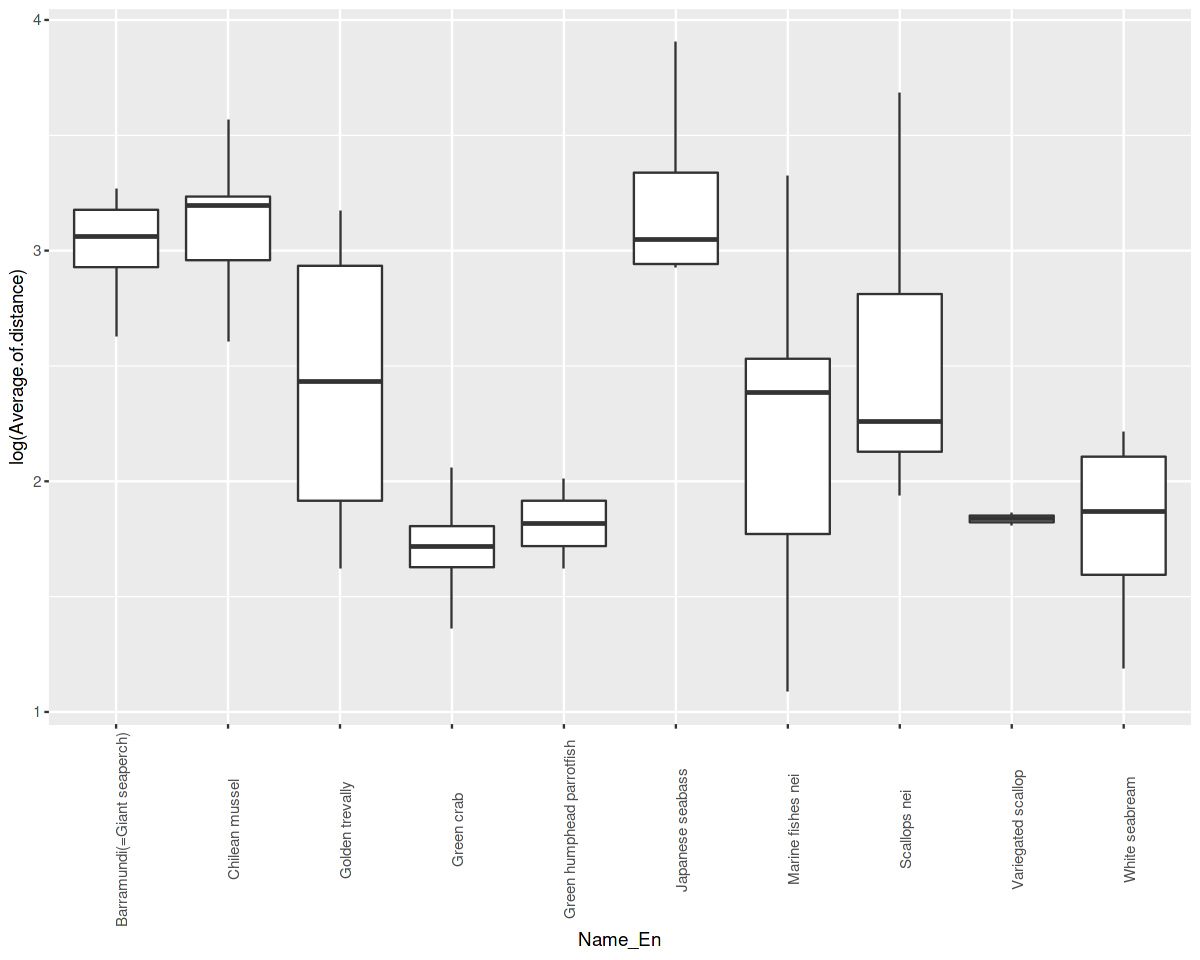

In [18]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_plm[data_plm$Name_En=="White seabream" | data_plm$Name_En=="Variegated scallop"| data_plm$Name_En=="Green humphead parrotfish"| data_plm$Name_En=="Golden trevally" | data_plm$Name_En=="Green crab"|
                                    data_plm$Name_En=="Barramundi(=Giant seaperch)" | data_plm$Name_En=="Scallops nei" | data_plm$Name_En=="Chilean mussel" |data_plm$Name_En=="Japanese seabass" | data_plm$Name_En=="Marine fishes nei" ,]  , aes(x=Name_En, y=log(Average.of.distance))) + 
  geom_boxplot()+theme(axis.text.x = element_text(angle = 90))

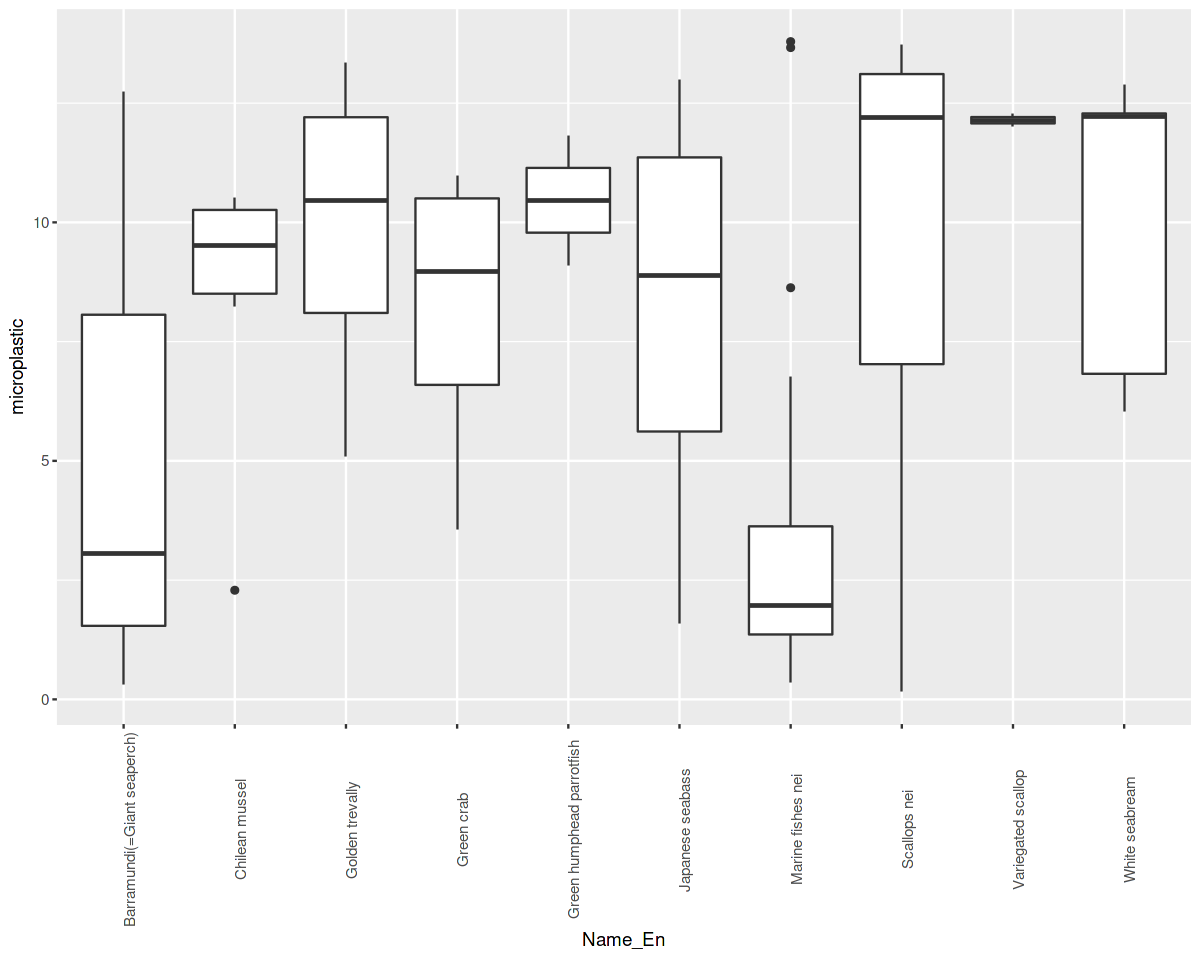

In [19]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_plm[data_plm$Name_En=="White seabream" | data_plm$Name_En=="Variegated scallop"| data_plm$Name_En=="Green humphead parrotfish"| data_plm$Name_En=="Golden trevally" | data_plm$Name_En=="Green crab"|
                                    data_plm$Name_En=="Barramundi(=Giant seaperch)" | data_plm$Name_En=="Scallops nei" | data_plm$Name_En=="Chilean mussel" |data_plm$Name_En=="Japanese seabass" | data_plm$Name_En=="Marine fishes nei" ,]  , aes(x=Name_En, y=microplastic)) + 
  geom_boxplot()+theme(axis.text.x = element_text(angle = 90))

In [20]:
# so the general trend is that when the microplastic is located nearer they tend to have a negative correlation, but not all of them follow this trend
# other factors such as the immune system of the different species plays a vital role as well as the structure of the fishing farms. Some of these offshore farms have a good filteration system 

In [107]:
zone_coef$Name_En = rownames(zone_coef)
zone_coef$estimate_class = ifelse(zone_coef$Estimate>0,0,1)
zone_coef$estimate_class = factor(zone_coef$estimate_class)

In [108]:
jointdataset <- merge(data_plm, zone_coef, by = c('Name_En'))

In [109]:
summary(jointdataset)
library(dplyr)
pos_data = jointdataset[jointdataset$estimate_class==0,]
neg_data = jointdataset[jointdataset$estimate_class==1,]
pos_data = sample_n(pos_data, 116)
dataset =  rbind(pos_data, neg_data)

                   Name_En     Average.Microplastic      Year     
 Atlantic salmon       :  30   Min.   :     1.0     Min.   :1970  
 Blue mussel           :  30   1st Qu.:     9.7     1st Qu.:2003  
 Whiteleg shrimp       :  29   Median :  2000.0     Median :2014  
 Penaeus shrimps nei   :  28   Mean   :130181.3     Mean   :2010  
 American cupped oyster:  27   3rd Qu.:120000.0     3rd Qu.:2016  
 Mangrove cupped oyster:  27   Max.   :973645.0     Max.   :2018  
 (Other)               :1472                                      
 Average.of.Merge1.Production   MP_Change         Yield_change     
 Min.   :      0.0            Min.   :  -0.999   Min.   :   -1.00  
 1st Qu.:     13.2            1st Qu.:  -0.168   1st Qu.:   -0.06  
 Median :    241.2            Median :   0.000   Median :    0.00  
 Mean   :  28418.1            Mean   :  59.803   Mean   :   48.14  
 3rd Qu.:   5146.0            3rd Qu.:   1.996   3rd Qu.:    0.23  
 Max.   :2874620.5            Max.   :5891.492   Max.   

In [110]:
summary(dataset)

                Name_En    Average.Microplastic      Year     
 Elongate giant clam:  9   Min.   :     1.1     Min.   :1970  
 Fluted giant clam  :  6   1st Qu.:    40.1     1st Qu.:2012  
 Sixfinger threadfin:  6   Median : 15273.5     Median :2015  
 Caramote prawn     :  5   Mean   :101641.5     Mean   :2012  
 Octopuses nei      :  5   3rd Qu.:105000.0     3rd Qu.:2016  
 Pacific horse clam :  5   Max.   :864000.0     Max.   :2018  
 (Other)            :196                                      
 Average.of.Merge1.Production   MP_Change         Yield_change     
 Min.   :     0.01            Min.   :  -0.999   Min.   :  -0.985  
 1st Qu.:     0.50            1st Qu.:  -0.295   1st Qu.:   0.000  
 Median :     3.19            Median :   0.000   Median :   0.000  
 Mean   :  5337.65            Mean   : 110.035   Mean   :  30.169  
 3rd Qu.:   317.99            3rd Qu.:   3.332   3rd Qu.:   0.312  
 Max.   :215350.00            Max.   :5891.492   Max.   :2657.772  
                    

[1] 0.006095748


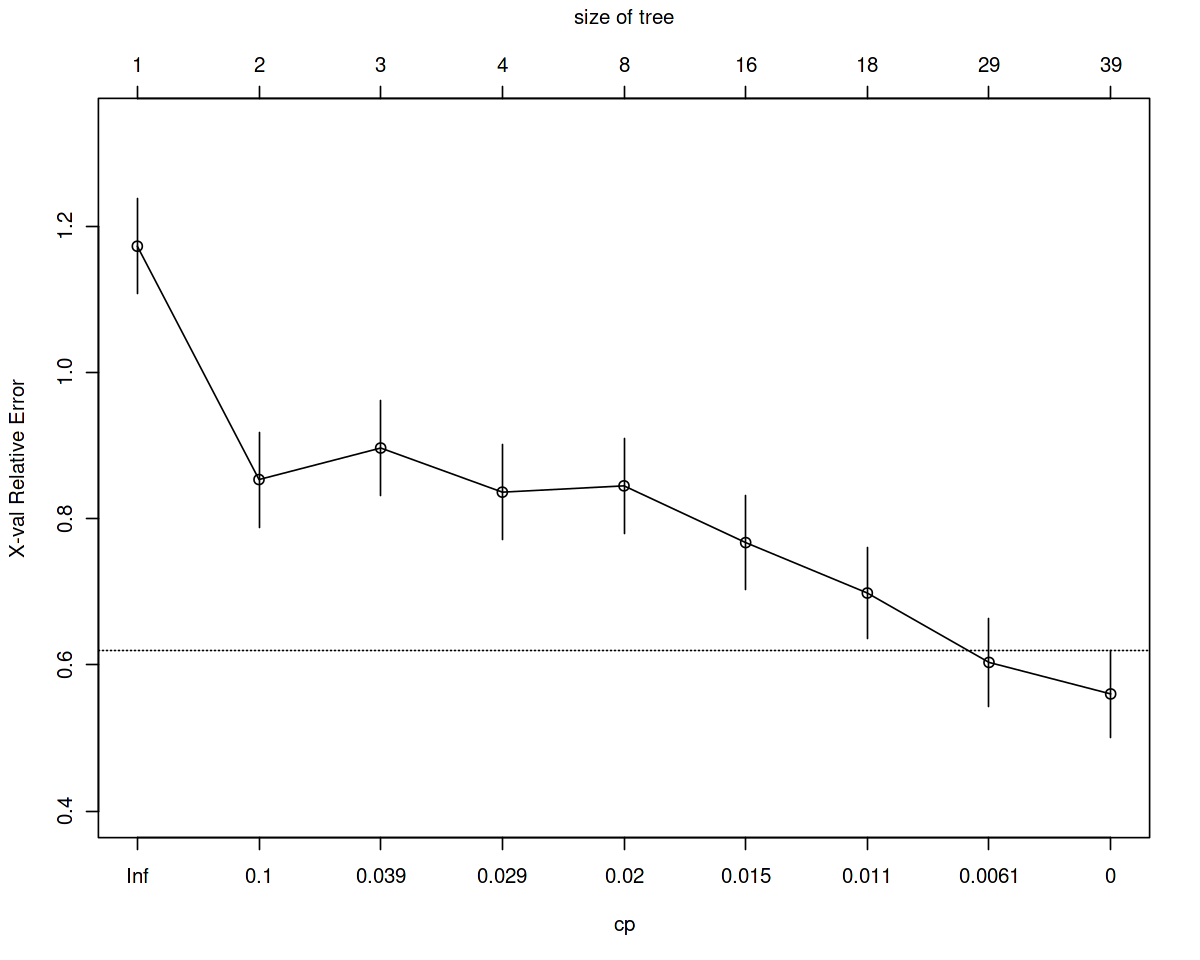

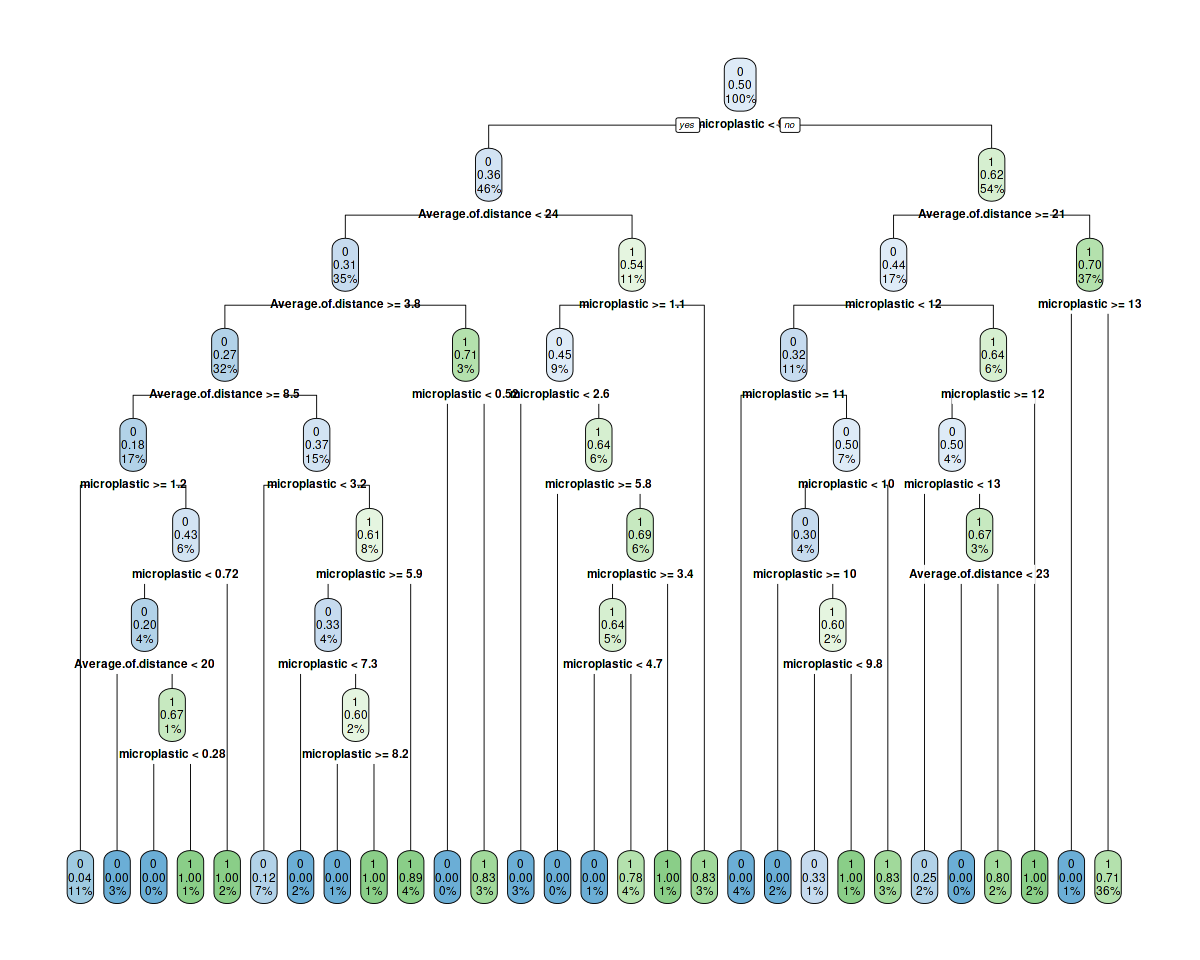

In [118]:
# going to built a cart to explain why some are more than 0 and why some are lesser than 0
library(rpart)
library(rpart.plot)
set.seed(1953)
thres = rpart(estimate_class~microplastic+Average.of.distance,data = dataset ,
                 method = 'class',control = rpart.control(minsplit = 2,cp = 0))

plotcp(thres)

cv_errorcap = thres$cptable[which.min(thres$cptable[,"xerror"]),"xerror"]+
  thres$cptable[which.min(thres$cptable[,"xerror"]),"xstd"]
i = 1
j = 4
while(thres$cptable[i,j]>cv_errorcap)
{
  i = i+1
}
optimal_cp = ifelse(i>1,sqrt(thres$cptable[i,1] * thres$cptable[i-1,1]),1)
print(optimal_cp) 

thres <- prune(thres, cp = optimal_cp)
rpart.plot(thres)


In [32]:
summary(log(data_plm$Average.of.distance))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8901  1.8443  2.3624  2.4221  3.0322  4.0339 

In [33]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  production_log ~ microplastic + log(Average.of.distance)
chisq = 53.293, df = 1, p-value = 2.873e-13
alternative hypothesis: significant effects


In [34]:
fixed_time = plm(production_log ~ microplastic+log(Average.of.distance)+factor(Year),data= aqua_pdf,model = "within")

In [35]:
summary(fixed_time)

Oneway (individual) effect Within Model

Call:
plm(formula = production_log ~ microplastic + log(Average.of.distance) + 
    factor(Year), data = aqua_pdf, model = "within")

Unbalanced Panel: n = 294, T = 1-30, N = 1643

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-10.443506  -0.649105   0.031028   0.786145   6.162181 

Coefficients:
                            Estimate  Std. Error t-value Pr(>|t|)    
microplastic              0.01103002  0.01250535  0.8820 0.377925    
log(Average.of.distance)  0.59073914  0.11028351  5.3566    1e-07 ***
factor(Year)1986         -2.08612629  0.87775246 -2.3767 0.017612 *  
factor(Year)1987         -1.50975882  0.83744510 -1.8028 0.071646 .  
factor(Year)1989         -2.18057058  0.82175534 -2.6536 0.008061 ** 
factor(Year)1990         -1.96786645  0.82576675 -2.3831 0.017310 *  
factor(Year)1991         -1.90549442  0.83081675 -2.2935 0.021975 *  
factor(Year)1992         -2.47245892  0.83777908 -2.9512 0.003221 ** 
factor(Yea

In [ ]:
pbgtest(fixed)

In [36]:
library(lmtest)
bptest(production_log ~ microplastic+log(Average.of.distance)+Name_En,data = data_plm)
coeftest(fixed, vcovHC(fixed, method = "arellano"))

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  production_log ~ microplastic + log(Average.of.distance) + Name_En
BP = 564.88, df = 295, p-value < 2.2e-16



t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
microplastic             -0.022144   0.018700 -1.1841    0.2366    
log(Average.of.distance)  0.944079   0.241330  3.9120 9.611e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [37]:
# from here onwards it will be analysis of health
health_data = read.csv("../input/microplastic/Cancer_data(Final).csv")

In [38]:
health_data$Fish.BalanaceSheet.Country..Name. = factor(health_data$Fish.BalanaceSheet.Country..Name.)
summary(health_data)

 Average.Microplastic  Cancer.cases       Fish.BalanaceSheet.Country..Name.
 Min.   :     0.0     Min.   :     5008   Canada  : 27                     
 1st Qu.:    11.3     1st Qu.:   705663   Mexico  : 27                     
 Median :   106.6     Median :  3337606   Panama  : 27                     
 Mean   :  2491.8     Mean   :  8628224   Bahamas : 23                     
 3rd Qu.:   421.9     3rd Qu.:  8428355   Belize  : 23                     
 Max.   :477286.8     Max.   :228690770   Colombia: 23                     
                                          (Other) :552                     
      Year       Consumption       
 Min.   :1990   Min.   :8.607e+03  
 1st Qu.:2002   1st Qu.:3.555e+06  
 Median :2013   Median :2.086e+07  
 Mean   :2008   Mean   :6.429e+08  
 3rd Qu.:2015   3rd Qu.:1.048e+08  
 Max.   :2017   Max.   :9.593e+10  
                                   

In [39]:
health_data = health_data[health_data$Average.Microplastic>0,]

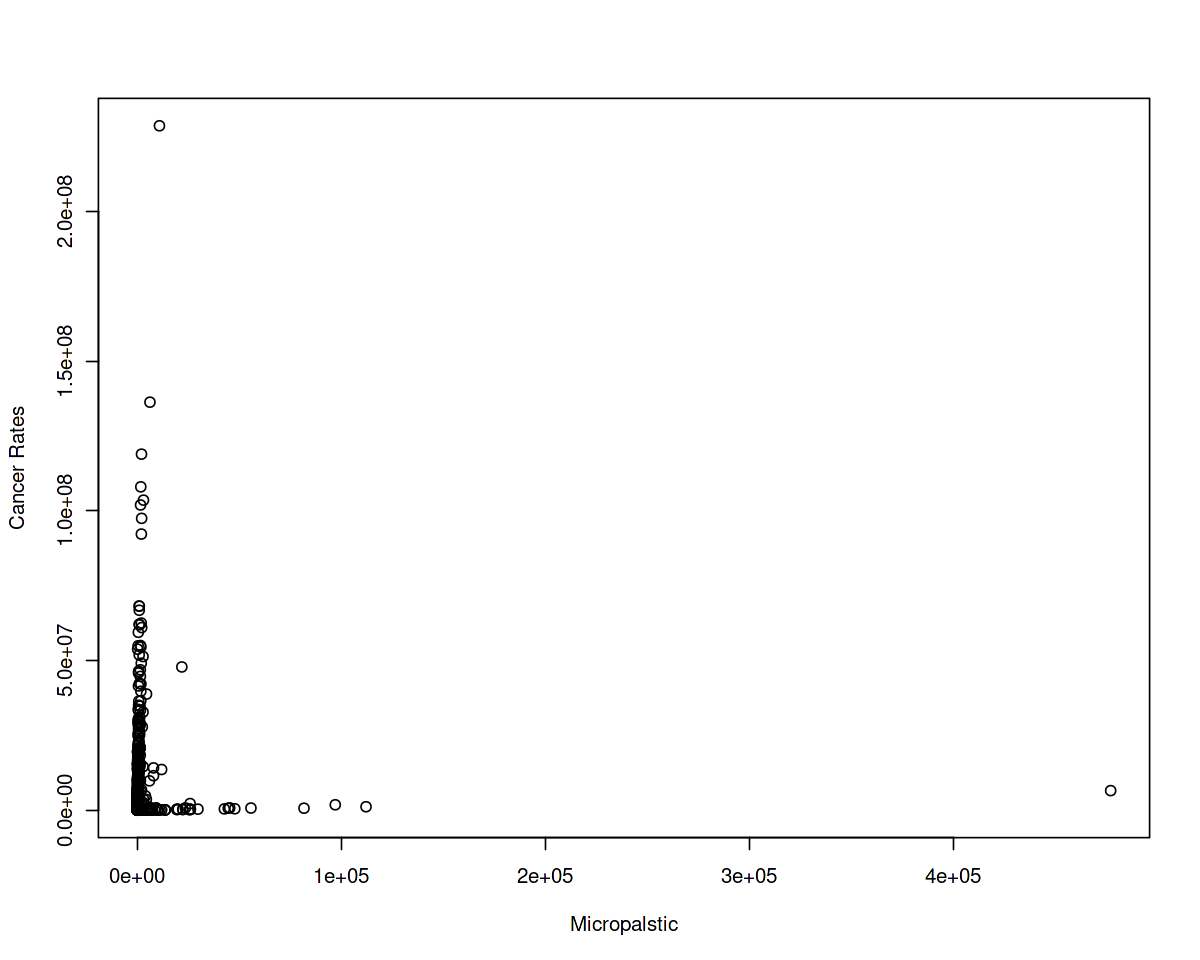

In [40]:
plot(health_data$Average.Microplastic,health_data$Cancer.cases,xlab = "Micropalstic",ylab = "Cancer Rates")

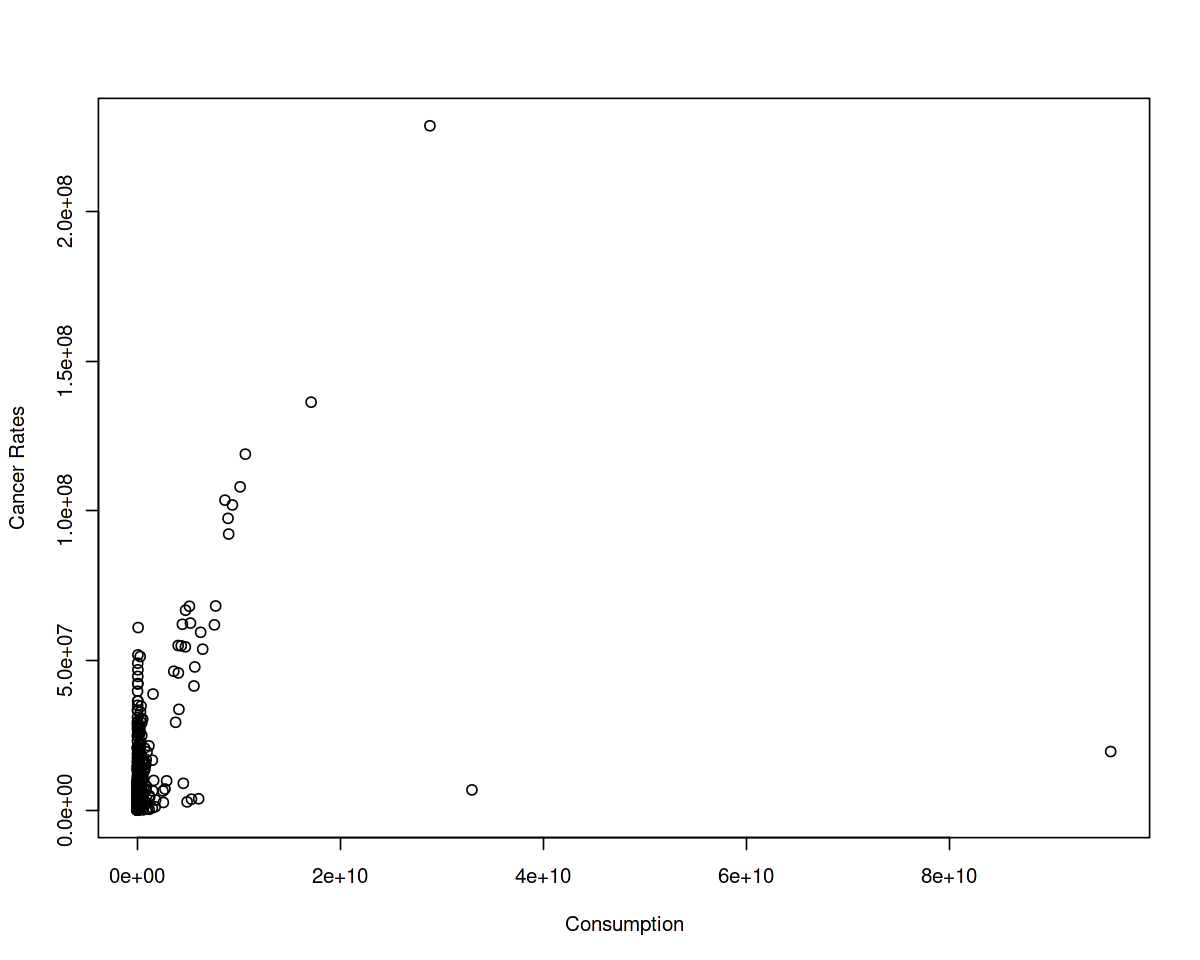

In [41]:
plot(health_data$Consumption,health_data$Cancer.cases,xlab = "Consumption",ylab = "Cancer Rates")

`geom_smooth()` using formula 'y ~ x'



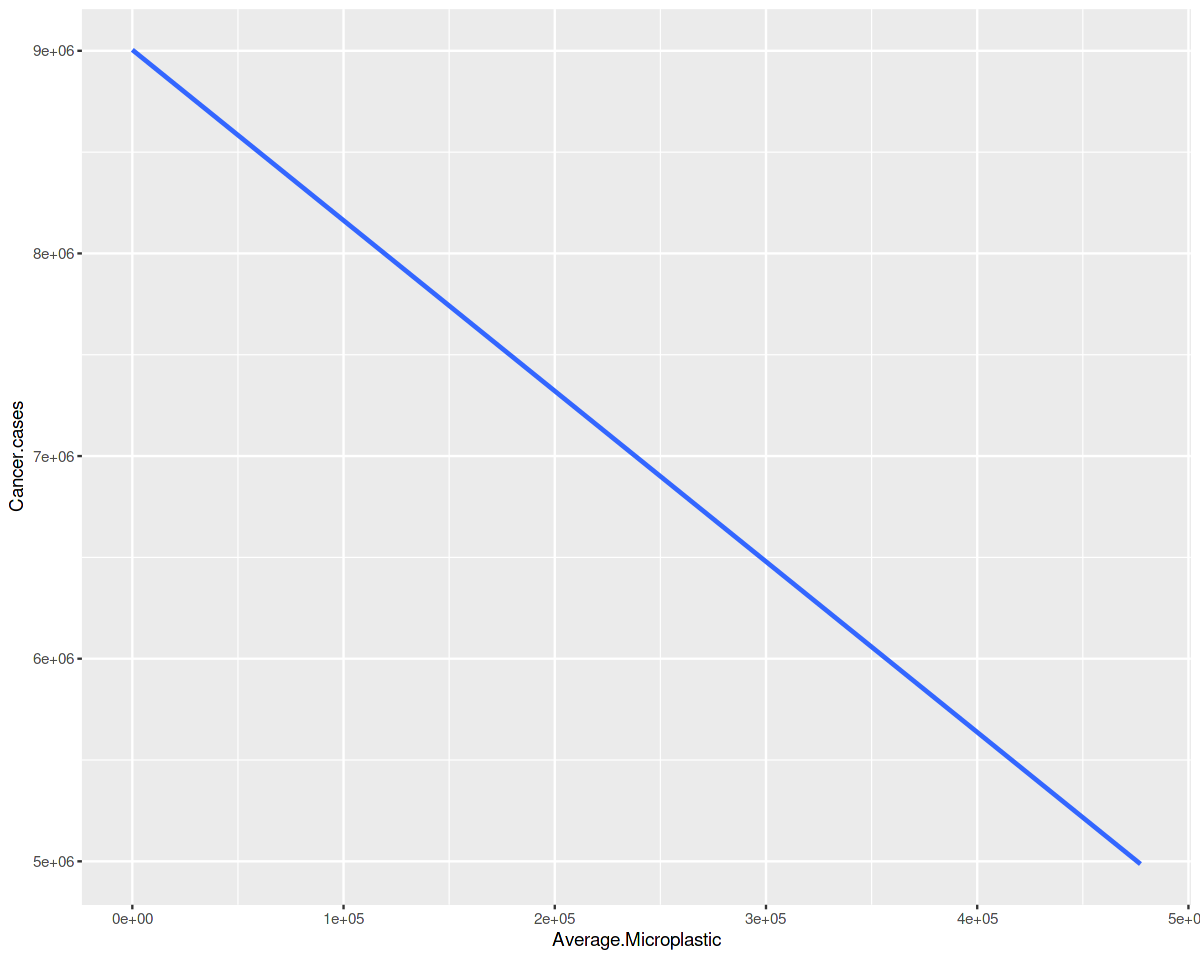

In [42]:
# cancer cases with respect to fish consumption
library(ggplot2)
ggplot(health_data ,aes(Average.Microplastic,Cancer.cases)) +
  geom_smooth(se = FALSE, method = lm)

`geom_smooth()` using formula 'y ~ x'



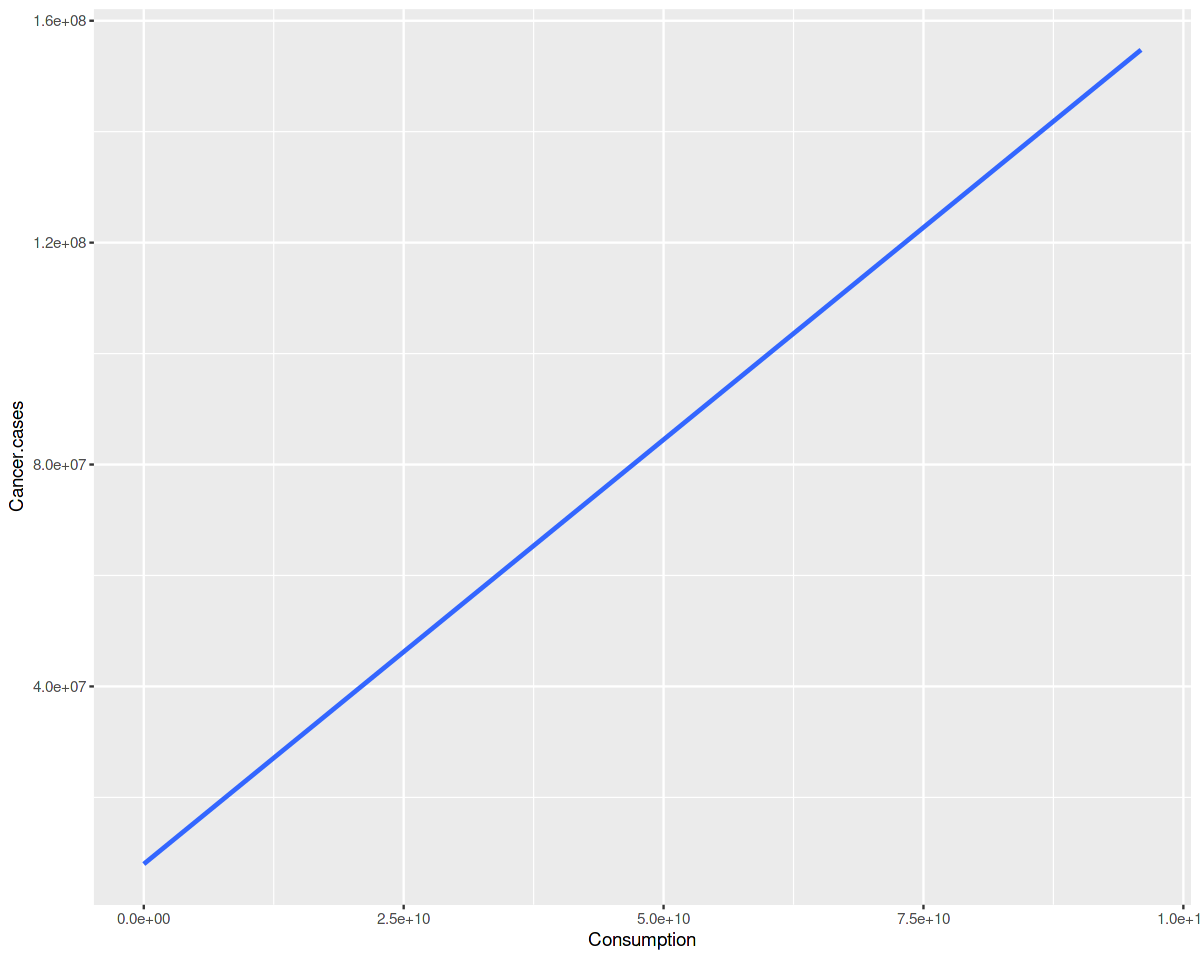

In [43]:
ggplot(health_data ,aes(Consumption,Cancer.cases)) +
  geom_smooth(se = FALSE, method = lm)

corrplot 0.88 loaded



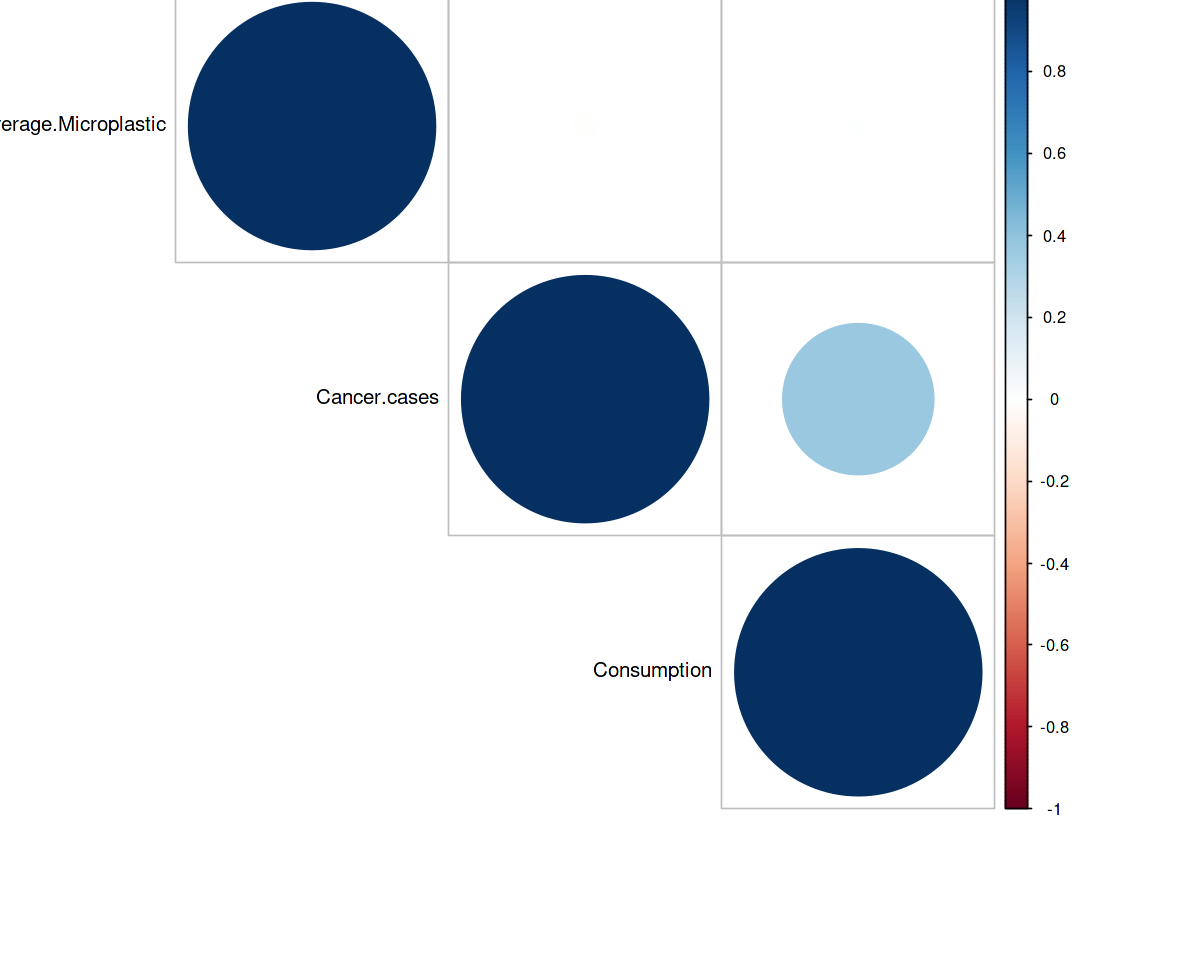

In [44]:
library(dplyr)
library(corrplot)
cor_data = select(health_data,-c(Year,Fish.BalanaceSheet.Country..Name.))
corrplot(cor(cor_data), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

lm(formula = (Cancer.cases) ~ (Average.Microplastic) + (Consumption), 
    data = health_data)

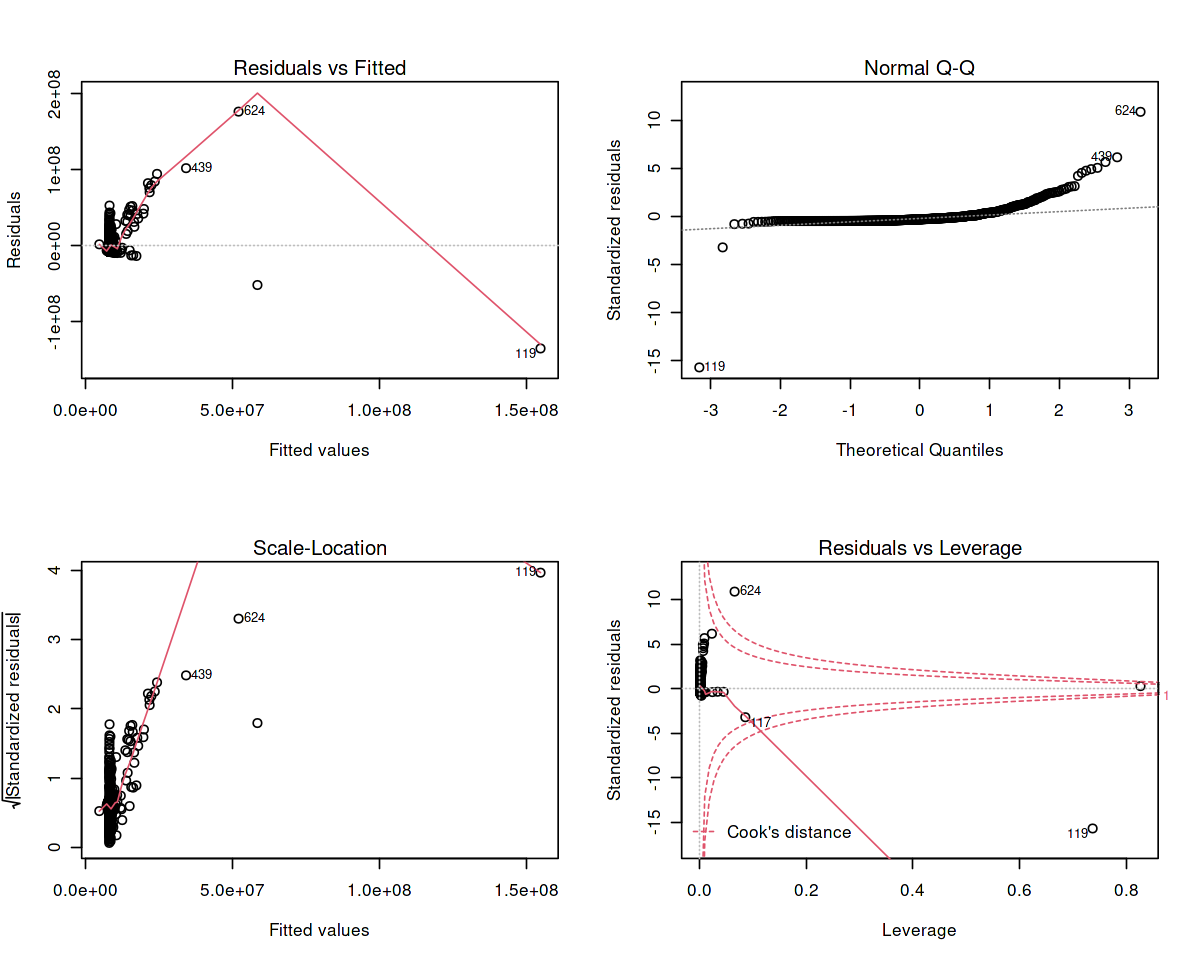

In [45]:
test_model  = lm((Cancer.cases) ~ (Average.Microplastic)+(Consumption),data= health_data)
par(mfrow=c(2,2))
test_model$call
plot(test_model)

In [64]:
health_data

,Average.Microplastic,Cancer.cases,Fish.BalanaceSheet.Country..Name.,Year,Consumption
,<dbl>,<dbl>,<fct>,<int>,<dbl>
1,8.4960,254327.32,Albania,2014,536928.72
2,0.2880,31974.89,Albania,2015,72367.17
3,4.4640,96421.78,Albania,2016,230802.12
4,5119.8008,32211.97,Albania,2017,74705.40
5,22.6560,333145.25,Algeria,2014,10936718.72
6,0.7680,41637.14,Algeria,2015,1318295.84
7,11.9040,124540.52,Algeria,2016,3810487.20
8,13652.8022,41480.57,Algeria,2017,1277565.84
9,2.3040,66345.77,Argentina,2013,1836928.02


lm(formula = log(Cancer.cases) ~ log(Average.Microplastic) + 
    log(Consumption) + Fish.BalanaceSheet.Country..Name., data = health_data)

Warning message:
“not plotting observations with leverage one:
  436”


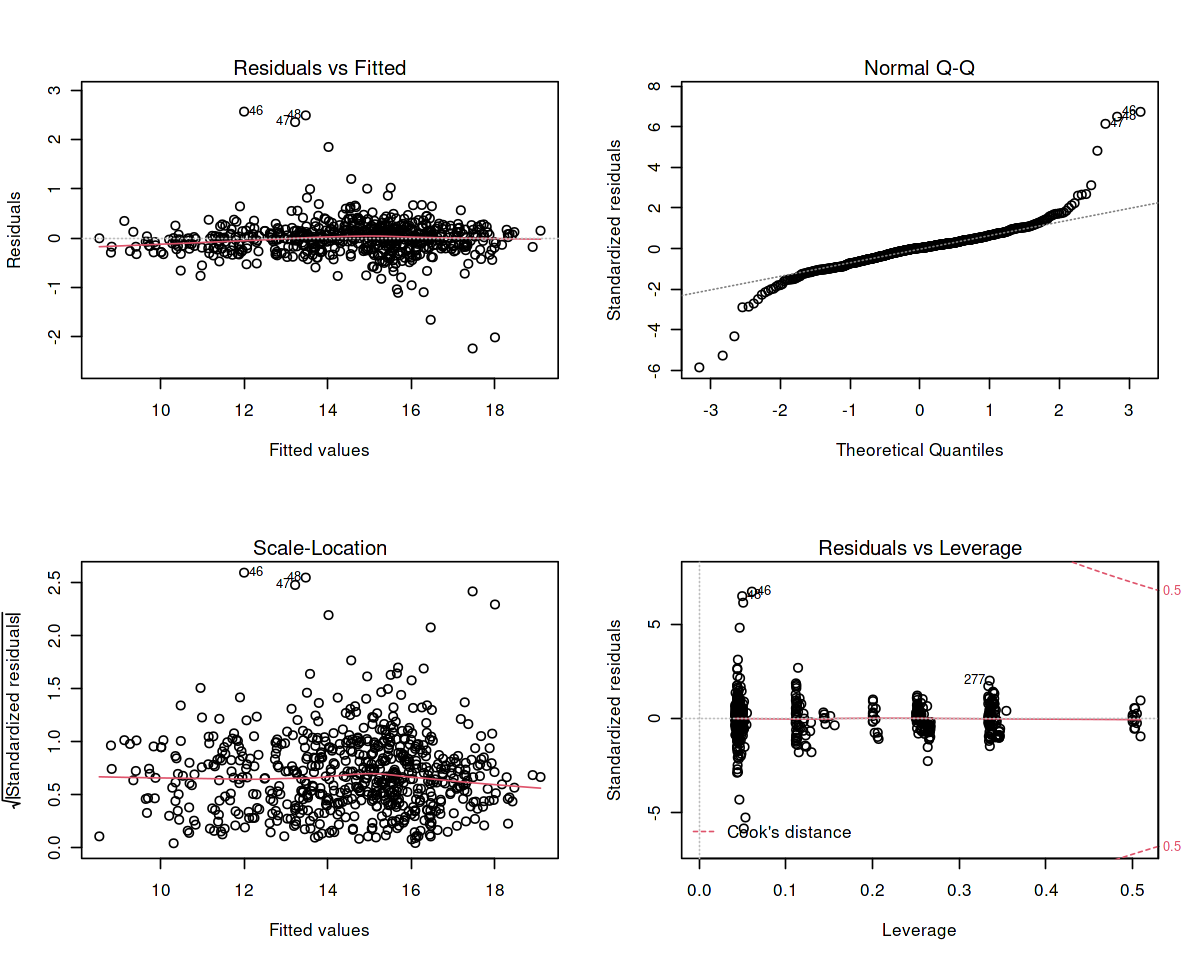

In [46]:
test_model  = lm(log(Cancer.cases) ~ log(Average.Microplastic)+log(Consumption)+Fish.BalanaceSheet.Country..Name.,data= health_data)
par(mfrow=c(2,2))
test_model$call
plot(test_model)

In [47]:
summary(test_model)


Call:
lm(formula = log(Cancer.cases) ~ log(Average.Microplastic) + 
    log(Consumption) + Fish.BalanaceSheet.Country..Name., data = health_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23707 -0.17389  0.01035  0.14867  2.56366 

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                              0.366090   0.254090
log(Average.Microplastic)                                0.009436   0.007604
log(Consumption)                                         0.898953   0.013796
Fish.BalanaceSheet.Country..Name.Algeria                -2.346413   0.280577
Fish.BalanaceSheet.Country..Name.Argentina              -2.038626   0.283879
Fish.BalanaceSheet.Country..Name.Australia              -1.433915   0.287490
Fish.BalanaceSheet.Country..Name.Bahamas                 1.234044   0.223440
Fish.BalanaceSheet.Country..Name.Bahrain                -0.398040   0.301570
Fish.BalanaceSheet.Country..Name.Banglade

In [48]:
library(plm)
pdf = pdata.frame(health_data, index = c( "Year","Fish.BalanaceSheet.Country..Name."))
pdf_year = pdata.frame(health_data, index = c( "Fish.BalanaceSheet.Country..Name.","Year"))

In [49]:
fixed = plm(log(Cancer.cases) ~ log(Average.Microplastic)+log(Consumption),data= pdf_year,model = "within")
random = plm(log(Cancer.cases) ~ log(Average.Microplastic)+log(Consumption),data= pdf_year,model = "random")

In [50]:
phtest(fixed,random)
# since the pvalue is lesser than 0.5 we should use the fixed model instead of the random model 


	Hausman Test

data:  log(Cancer.cases) ~ log(Average.Microplastic) + log(Consumption)
chisq = 125.06, df = 2, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


In [51]:
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = log(Cancer.cases) ~ log(Average.Microplastic) + 
    log(Consumption), data = pdf_year, model = "within")

Unbalanced Panel: n = 102, T = 1-24, N = 641

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.237065 -0.173893  0.010352  0.148666  2.563662 

Coefficients:
                           Estimate Std. Error t-value Pr(>|t|)    
log(Average.Microplastic) 0.0094357  0.0076039  1.2409   0.2152    
log(Consumption)          0.8989527  0.0137963 65.1588   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    797.2
Residual Sum of Squares: 82.953
R-Squared:      0.89594
Adj. R-Squared: 0.87599
F-statistic: 2311.86 on 2 and 537 DF, p-value: < 2.22e-16

In [52]:
country_coef = as.data.frame(summary(fixef(fixed)))

In [53]:
country_coef

,Estimate,Std. Error,t-value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
Albania,0.366089906,0.2540898,1.44078952,1.502270e-01
Algeria,-1.980322973,0.2800693,-7.07083163,4.816873e-12
Argentina,-1.672536367,0.2941474,-5.68604883,2.136709e-08
Australia,-1.067824994,0.3058409,-3.49143908,5.199706e-04
Bahamas,1.600133479,0.2411387,6.63574032,7.903272e-11
Bahrain,-0.031950525,0.2954487,-0.10814238,9.139231e-01
Bangladesh,-4.862139703,0.3393324,-14.32854560,1.148509e-39
Belize,0.293585221,0.2384359,1.23129602,2.187511e-01
Bosnia and Herzegovina,0.711694027,0.2500796,2.84587016,4.598247e-03


In [ ]:
country_coef[country_coef$Estimate>0,]

In [54]:
country_coef$Fish.BalanaceSheet.Country..Name. = rownames(country_coef)
country_coef$estimate_class = ifelse(country_coef$Estimate>0,0,1)
country_coef$estimate_class = factor(country_coef$estimate_class)
jointdataset <- merge(health_data, country_coef, by = c('Fish.BalanaceSheet.Country..Name.'))

In [55]:
summary(jointdataset)
pos_data = jointdataset[jointdataset$estimate_class==0,]
neg_data = jointdataset[jointdataset$estimate_class==1,]
neg_data = sample_n(neg_data, 248)
dataset =  rbind(pos_data, neg_data)

 Fish.BalanaceSheet.Country..Name. Average.Microplastic  Cancer.cases      
 Canada  : 24                      Min.   :     0.1     Min.   :     5008  
 Mexico  : 24                      1st Qu.:    27.7     1st Qu.:   602624  
 Panama  : 24                      Median :   131.8     Median :  3376892  
 Bahamas : 23                      Mean   :  2729.0     Mean   :  8981726  
 Belize  : 23                      3rd Qu.:   521.2     3rd Qu.:  8987936  
 Colombia: 23                      Max.   :477286.8     Max.   :228690770  
 (Other) :500                                                              
      Year       Consumption           Estimate         Std. Error    
 Min.   :1990   Min.   :8.607e+03   Min.   :-6.1797   Min.   :0.2133  
 1st Qu.:2001   1st Qu.:3.555e+06   1st Qu.:-1.7470   1st Qu.:0.2412  
 Median :2014   Median :2.437e+07   Median :-0.3763   Median :0.2609  
 Mean   :2008   Mean   :6.530e+08   Mean   :-0.5841   Mean   :0.2734  
 3rd Qu.:2015   3rd Qu.:1.107e+08   3

In [56]:
summary(dataset)

 Fish.BalanaceSheet.Country..Name. Average.Microplastic  Cancer.cases      
 Bahamas    : 23                   Min.   :     0.1     Min.   :     5008  
 Belize     : 23                   1st Qu.:    28.2     1st Qu.:   665393  
 Guyana     : 23                   Median :   131.6     Median :  3574425  
 Puerto Rico: 23                   Mean   :  2536.7     Mean   :  9004430  
 Saint Lucia: 23                   3rd Qu.:   450.9     3rd Qu.:  9412092  
 Suriname   : 23                   Max.   :477286.8     Max.   :228690770  
 (Other)    :358                                                           
      Year       Consumption           Estimate         Std. Error    
 Min.   :1990   Min.   :8.607e+03   Min.   :-6.1797   Min.   :0.2133  
 1st Qu.:2001   1st Qu.:2.365e+06   1st Qu.:-1.4506   1st Qu.:0.2384  
 Median :2013   Median :1.668e+07   Median : 0.0780   Median :0.2551  
 Mean   :2008   Mean   :6.649e+08   Mean   :-0.2664   Mean   :0.2668  
 3rd Qu.:2015   3rd Qu.:9.004e+07   3

In [57]:
summary(log(dataset$Average.Microplastic))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.631   3.338   4.879   4.667   6.111  13.076 

[1] 0.005702474


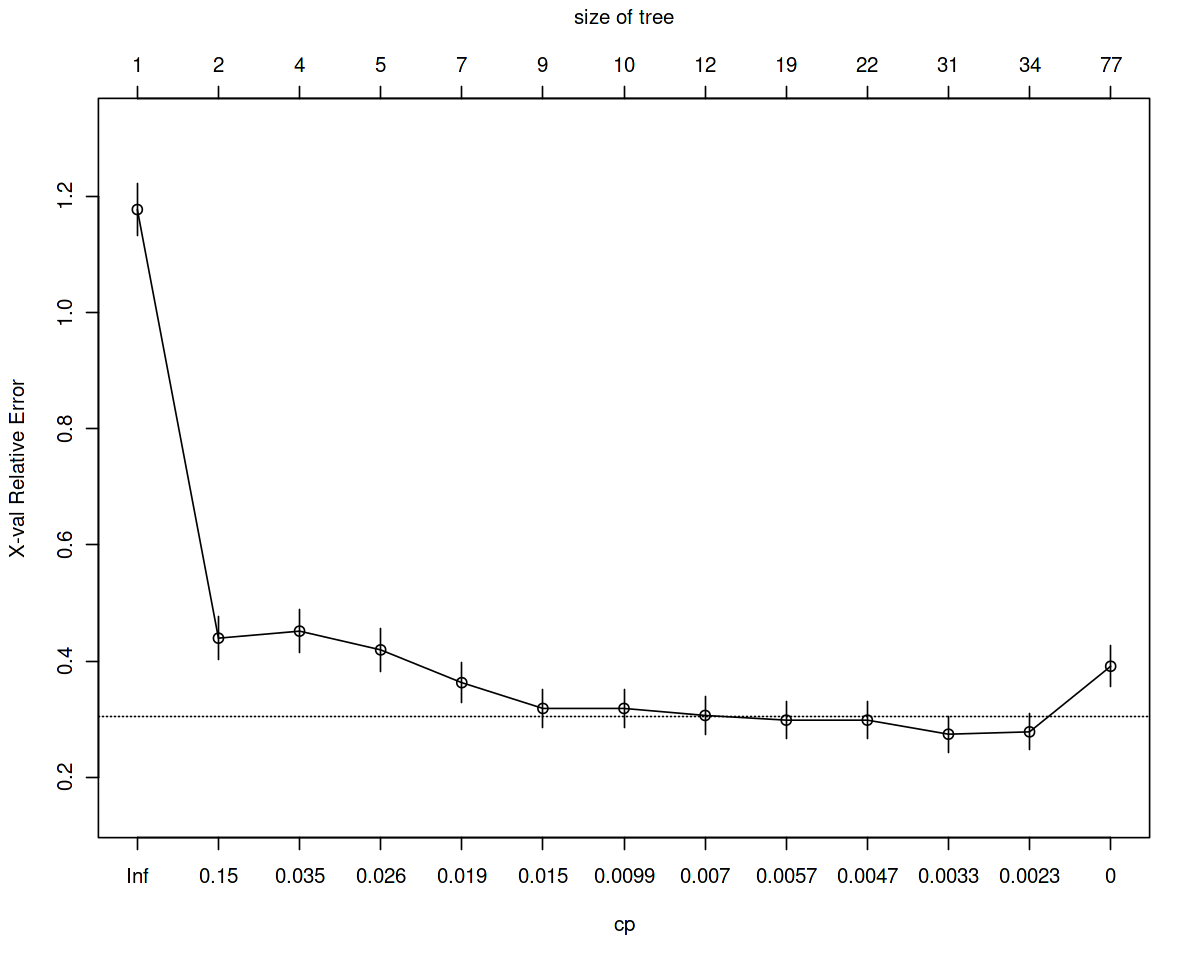

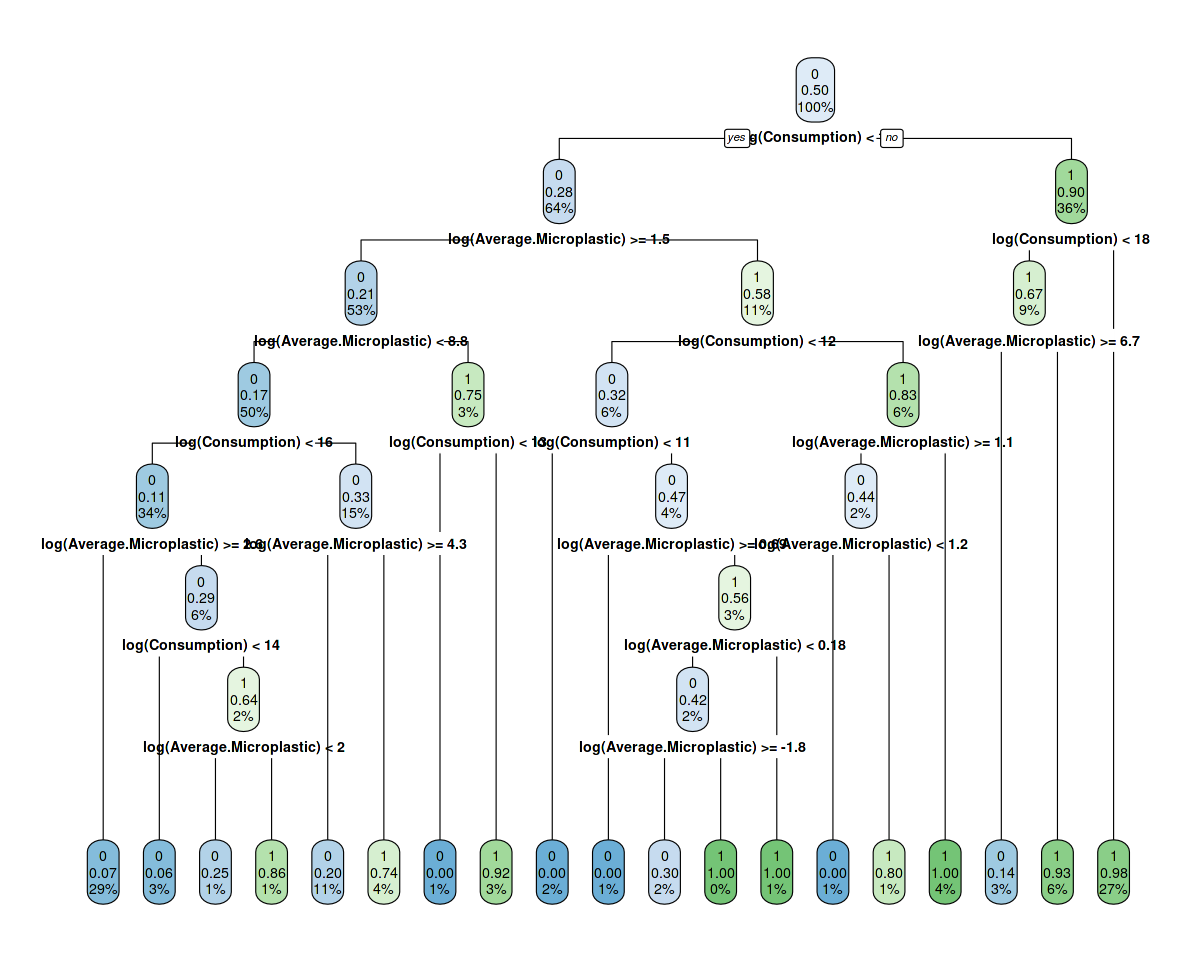

In [58]:
# going to built a cart to explain why some are more than 0 and why some are lesser than 0
library(rpart)
library(rpart.plot)
set.seed(1953)
thres = rpart(estimate_class~log(Average.Microplastic)+log(Consumption),data = dataset ,
                 method = 'class',control = rpart.control(minsplit = 2,cp = 0))

plotcp(thres)

cv_errorcap = thres$cptable[which.min(thres$cptable[,"xerror"]),"xerror"]+
  thres$cptable[which.min(thres$cptable[,"xerror"]),"xstd"]
i = 1
j = 4
while(thres$cptable[i,j]>cv_errorcap)
{
  i = i+1
}
optimal_cp = ifelse(i>1,sqrt(thres$cptable[i,1] * thres$cptable[i-1,1]),1)
print(optimal_cp) 

thres <- prune(thres, cp = optimal_cp)
rpart.plot(thres)


In [ ]:
# from the cart model -> it is saying those countries who have a large fish consumption have a negative fixed effect-> SO BY right with high consumption we should see a hughe increase in cancer cases but the fixed effect of these countries are negative implying superior helthcare services

# the other case for why some of these countries have a positive fixed effect low consumption and a higher mp present near the coastal lines -> why did these cause a negatgive ?

# there are mutliple possible explanantion these are only some of those 

In [ ]:
# lets look at the max and the min of the model and see if we can see what is the major difference betweeen them
country_coef[country_coef[,1]==max(country_coef[,1]),]

In [ ]:
country_coef[country_coef[,1]==min(country_coef[,1]),]

In [ ]:
country_coef[country_coef[,1]>0,]

In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
library(ggplot2)
 ggplot(health_data, aes(x=Fish.BalanaceSheet.Country..Name., y=log(Average.Microplastic+1))) + 
  geom_boxplot()+theme(axis.text.x = element_text(angle = 90))

In [ ]:
# so what is so different in china 
summary(health_data[health_data$Fish.BalanaceSheet.Country..Name.=="Singapore",])

In [ ]:
summary(health_data[health_data$Fish.BalanaceSheet.Country..Name.=="Samoa",])

In [ ]:
fixed_time = plm(log(Cancer.cases) ~ log(Average.Microplastic)+log(Consumption)+factor(Year),data= pdf_year,model = "within")

In [ ]:
plmtest(fixed, c("time"), type=("bp"))

In [ ]:
pFtest(fixed_time, fixed)
# so fixed time effect is needed -> why is it neeeded ?
# the effect of the years are fixed across all cities 

In [ ]:
summary(fixed_time)

In [59]:
library(lmtest)
bptest(log(Cancer.cases) ~ log(Average.Microplastic)+log(Consumption)+health_data$Fish.BalanaceSheet.Country..Name.,data = health_data)
coeftest(fixed, vcovHC(fixed, method = "arellano"))


	studentized Breusch-Pagan test

data:  log(Cancer.cases) ~ log(Average.Microplastic) + log(Consumption) +     health_data$Fish.BalanaceSheet.Country..Name.
BP = 268.02, df = 103, p-value < 2.2e-16



t test of coefficients:

                           Estimate Std. Error t value Pr(>|t|)    
log(Average.Microplastic) 0.0094357  0.0104934  0.8992   0.3689    
log(Consumption)          0.8989527  0.0541289 16.6076   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [62]:
library(car)
durbinWatsonTest(test_model)

 lag Autocorrelation D-W Statistic p-value
   1       0.5998506     0.7992074       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test for serial correlation in panel models

data:  log(Cancer.cases) ~ log(Average.Microplastic) + log(Consumption)
DW = 0.79921, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors
